# Cholesterol data regression model
The data in cholesterol.txt include the total cholesterol levels ($mg/ml$) of 24 patients ($y$) and their age ($x$).
* Plot a scatter plot between $y$ and $x$ and fit a linear regression model to the data.
* Test the hypothesis $H_0$: $\beta_1 = 0$ versus $H_1$: $\beta_1\neq 0 $ and calculate a $0.95$-confidence interval for the parameter of $x$ in the fitted model. How do we interpret $\beta_1$?
* Calculate a $0.95$-confidence interval for the cholesterol levels of a 35 years old patient as well as for the $E(y)$
* Use a visual normality test and plot the residuals, $e_i$ vs the fitted values $\hat{y}_i$. What can we infer?

(Assignment for the course *Statistical Models* taught by Prof. Chrysseis Caroni, NTUA)

## Import data

In [1]:
data <- read.table("./data/cholesterol.txt", header = TRUE)
attach(data)
data

y,x
3.5,46
4.5,57
2.1,22
2.5,22
2.3,28
3.3,29
1.9,20
3.0,25
3.8,43
4.6,63


## Histograms

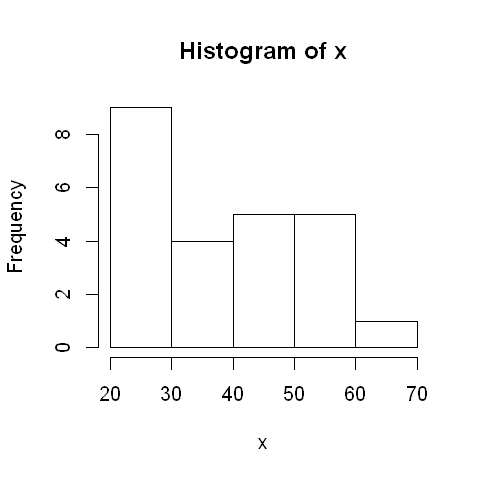

In [2]:
library(repr)
options(repr.plot.width=4, repr.plot.height=4) # Change plot size to 4 x 3
hist(x)

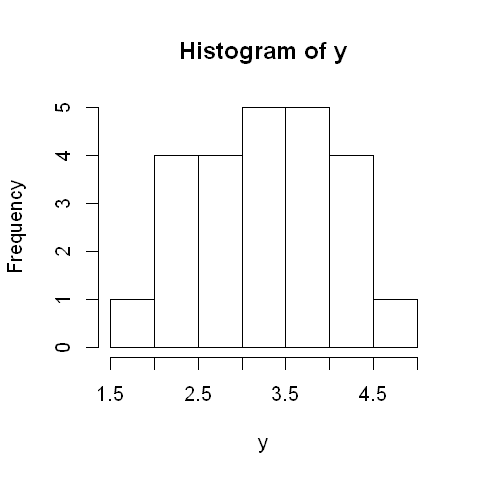

In [3]:
hist(y)

## Fit a linear model


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    1.27987      0.05262  


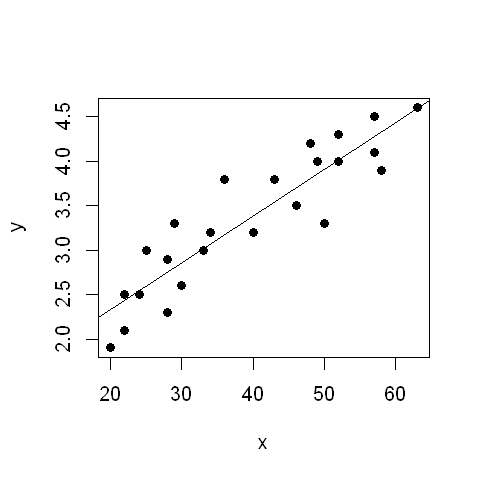

In [4]:
# data plot and linear regression
plot(y~x,pch=19)
lm(y~x)
abline(lm(y~x))

Therefore the fitted model is
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x$$
with parameters:
    $$\hat{\beta}_0 = 1.27987$$
    $$\hat{\beta}_1 = 0.05262$$

## Hypothesis testing
We set the null and alternative hypotheses as follows.

$H_0$: $\beta_1 = 0$

and

$H_1$: $\beta_1\neq 0$

in order to test whether our model is sufficient.

In [5]:
# regression model details
model <- lm(y~x)
model
summary(model)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    1.27987      0.05262  



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6111 -0.2151 -0.0058  0.2297  0.6256 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.279868   0.215699   5.934 5.69e-06 ***
x           0.052625   0.005192  10.136 9.43e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.334 on 22 degrees of freedom
Multiple R-squared:  0.8236,	Adjusted R-squared:  0.8156 
F-statistic: 102.7 on 1 and 22 DF,  p-value: 9.428e-10


We can see from the model's summary that the t-value for $\hat{\beta}_1$ is (for $n-2 = 22$ degrees of freedom):

$$t = 10.136$$

and the respective p-value is:

$$P(|t|>10.136) = 2 P(t>10.136) << 0.001$$

which means that we reject $H_0$ and therefore our linear model can describe our data sufficiently.

In [6]:
# 0.95 confidence interval for b0, b1
confint(model)

,2.5 %,97.5 %
(Intercept),0.83253668,1.72720003
x,0.04185806,0.06339175


Therefore the confidence interval for $\hat{\beta}_1$:
$$
0.04185806 < \hat{\beta}_1 < 0.06339175
$$

### Model explanation

The value of $\hat{\beta}_1$ shows how $y$ (cholesterol levels) will increase if we increase $x$ (a patient's age) by one. In our case cholesterol levels will increase by $10.136 \,mg/ml$.

## A more detailed analysis of the hypothesis testing is presented below.

Firstly we compute the following quantities:

$$
\begin{aligned}
    S_{xx} &= \sum_i (x_i - \bar{x})^2\\
    S_{yy} &= \sum_i (y_i - \bar{y})^2\\
    S_{xy} &= \sum_i (x_i - \bar{x})(y_i-\bar{y})
\end{aligned}
$$

In [7]:
Sxx <- sum((x - mean(x))^2)

In [8]:
Syy <- sum((y - mean(y))^2)

In [9]:
Sxy <- sum((x-mean(x))*(y-mean(y)))

We note that the coefficients of our model are given by the following relationships:
$$
\begin{aligned}
    \hat{\beta}_1 &= \frac{S_{xy}}{S_{xx}}\\
    \hat{\beta}_0 &= \bar{y} - \hat{\beta}_1\cdot \bar{x}
\end{aligned}
$$


In [10]:
beta1_hat <- Sxy/Sxx
beta1_hat

[1] 0.0526249

In [11]:
beta0_hat <- mean(y) - beta1_hat*mean(x)
beta0_hat

[1] 1.279868

Under the assumptions of normal regression analysis
$$
t = \frac{\hat{\beta}_1 - \beta_1}{\hat{\sigma}} \sqrt{\frac{(n-2)S_{xx}}{n}}
$$
is a value of a random variable having the $t$ distribution with $n-2$ degrees of freedom

where $\hat{\sigma}$ is the maximum likelihood estimate of $\sigma$ and is given by:
$$
\begin{aligned}
\hat{\sigma} &= \sqrt{\frac{1}{n}\cdot \sum_i (y_i - \hat{y}_i)^2}\\
             &=\sqrt{\frac{1}{n} \left(S_{yy} - \hat{\beta}_1\cdot S_{xy}\right))}
\end{aligned}
$$


In [12]:
n <- length(x)#24
sigma_hat <- sqrt((Syy-beta1_hat*Sxy)/n)
sigma_hat

[1] 0.3198183

In [13]:
t_val =  (beta1_hat/sigma_hat) * sqrt((n-2)*Sxx/n)
t_val

[1] 10.13643

The p-value for the two-tailed test is given by:
$$ 
P(|t|> 10.136) = 2\cdot P(t>10.1364341259017) = 9.436\times 10^{-10} << 0.01
$$

In [14]:
# p-value
2*pt(q=10.136, df=n-2, lower.tail=FALSE)

[1] 9.435689e-10

which means that we reject $H_0$ as stated above

##  A detailed analysis of the confidence interval

Under the assumption of normal regression analysis,
$$
\hat{\beta_1} - t_{a/2} \cdot \hat{\sigma}\sqrt{\frac{n}{(n-2)S_{xx}}} < \beta_1 < \hat{\beta_1} + t_{a/2} \cdot \hat{\sigma}\sqrt{\frac{n}{(n-2)S_{xx}}}
$$
is a $(1-a)100\%$ confidence interval for the parameter $\beta_1$

In [15]:
conf_interv <- function(a, n) {
    t_a2 <- abs(qt(abs(a/2),n-2))
    print(beta1_hat - t_a2* sigma_hat*sqrt(n/((n-2)*Sxx)))
    print(beta1_hat + t_a2* sigma_hat*sqrt(n/((n-2)*Sxx))) 
}

In [16]:
# 95% confidence interval
conf_interv(0.05,24) 

[1] 0.04185806
[1] 0.06339175


## Predictions and confidence intervals

Let us assume a prediction:
$$\hat{y}_0 = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_0$$

We note that the quantity:
$$
t = \frac{\hat{y}_0 - y_0}{\hat{\sigma}\sqrt{\frac{n}{n-2}\left(1+\frac{1}{n}+\frac{(x_0 - \bar{x})^2}{S_{xx}}\right)}}
$$
is a value of a random variable having the $t$-distribution with $n-2$ degrees of freedom

<!-- therefore a confidence interval for the prediction is:
$$
\hat{y}_0 - t_{a/2} \cdot S \cdot \sqrt{\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \hat{y}_0 <\hat{y}_0 + t_{a/2} \cdot S \cdot \sqrt{\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)}
$$
where:
$$
\begin{aligned}
& S^2 = \frac{1}{n-2}\sum_i (y_i - \hat{y}_i)^2\\
\Rightarrow & S= \frac{n}{n-2}\hat{\sigma}
\end{aligned}
$$ -->

Therefore the confidence interval for the prediction is (prediction interval):
$$
\hat{y}_0 - t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \hat{y}_0 < \hat{y}_0 + t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(1+\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} 
$$

whereas the confidence interval for the mean response is:
$$
\hat{y}_0 - t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} < \mu_Y < \hat{y}_0 + t_{a/2} \cdot \hat{\sigma} \cdot \sqrt{\frac{n}{n-2}\left(\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}}\right)} 
$$

In [17]:
# for 35 years old patient
predict(model, newdata=list(x=35), interval = "prediction", level = .95)

fit,lwr,upr
3.12174,2.413102,3.830378


In [18]:
# for the mean y at x=35
predict(model, newdata = list(x=35),interval = "confidence", level = .95) 

fit,lwr,upr
3.12174,2.97255,3.27093


which means that a $95\%$ confidence interval for the prediction
$$\hat{y}_0 = 3.12$$
is (prediction interval for $\hat{y}_0$):
$$2.413102 < \hat{y}_0 < 3.830378$$
and the confidence interval for the mean is:
$$2.97255< \mu_Y < 3.27093$$

# Visual normality test for residuals 

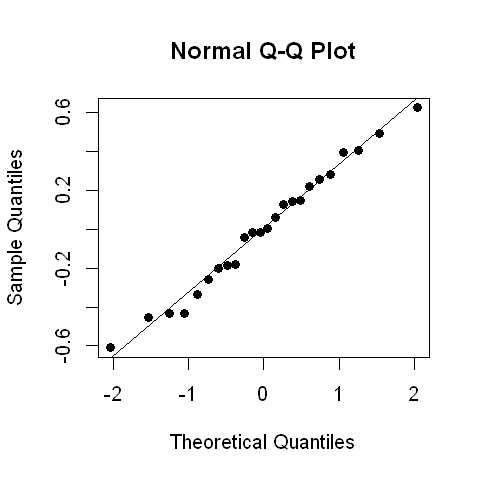

In [19]:
# normal q-q plot
qqnorm(model$residuals,pch=19)
qqline(model$residuals)

The qq-plot is excellent (points fall on red line). The residuals seem to be normally distributed.

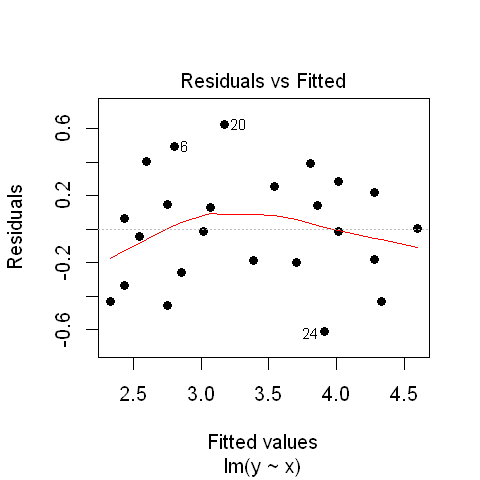

In [20]:
# residuals vs fitted plot
plot(model, which = 1, pch=19)

Residuals should be normally distributed around each fitted value, under the assumption that our data are normally distributed. In that case (data and residuals normally distributed), the residuals plot would show the majority of points at the center of the plot (grey dashed line) with some points drifting symmetrically from the center.

*Homoscedasticity* means that the residuals are approximately equal for all fitted values. In that case, the residuals plot should have the same width for all the fitted values. On the contrary, *heteroscedasticity* is evident in a residuals plot by a cluster of points that gets wider as fitted values increase.

A lowess fit (red line) is fitted in order to better show any trend in data.

It is evident that both the normality and homoscedasticity assumptions are satisfied.

### Some additional plots and statistics

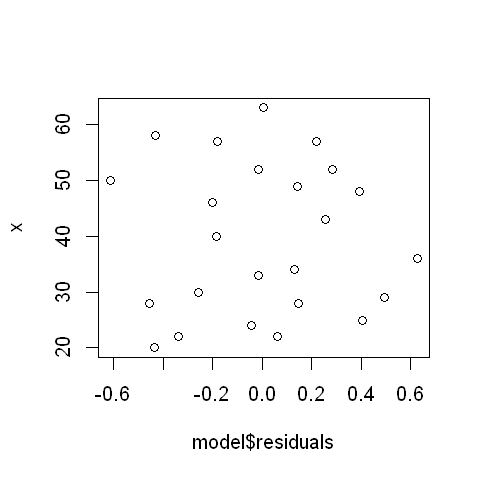

In [21]:
#ei vs xi
plot(model$residuals, x)

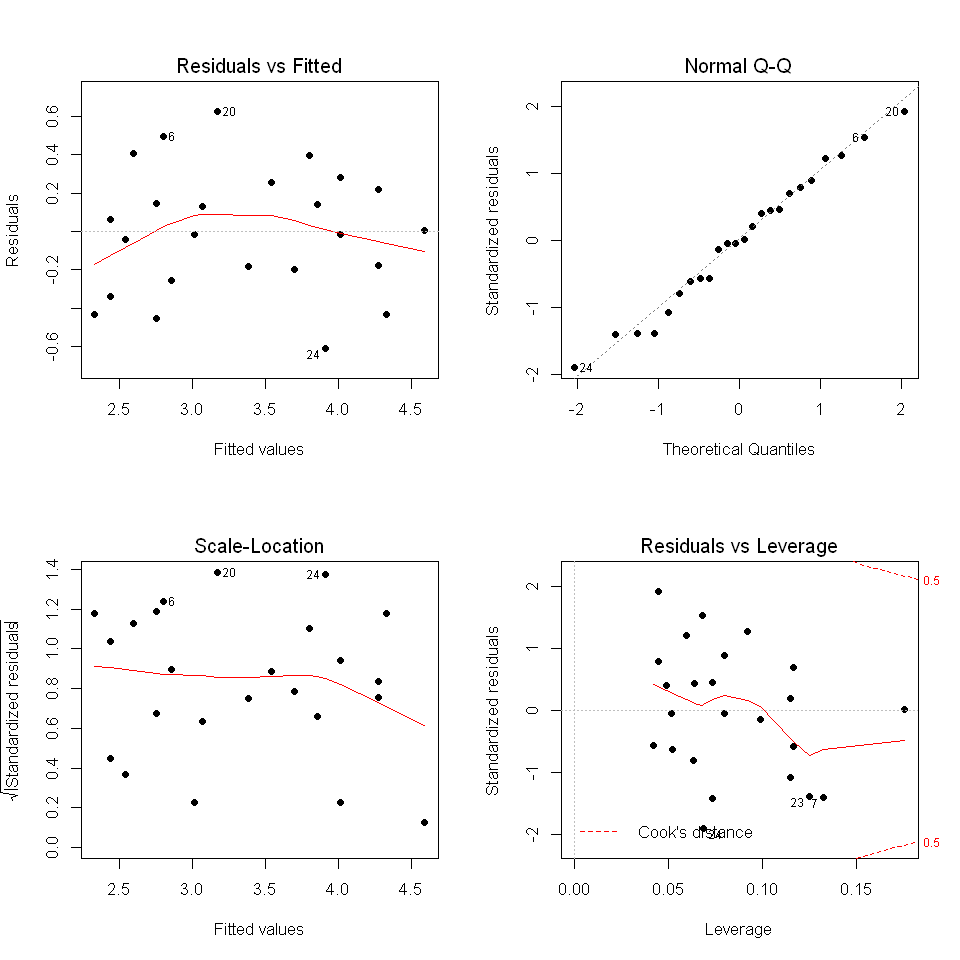

In [22]:
#synopsis
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
plot(model, pch = 19)

In [23]:
# cor test
cor(x,y)
cor.test(x,y)

[1] 0.9075481


	Pearson's product-moment correlation

data:  x and y
t = 10.136, df = 22, p-value = 9.428e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7953192 0.9596244
sample estimates:
      cor 
0.9075481 
